In [1]:
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
################## Least Polluted Day ######################

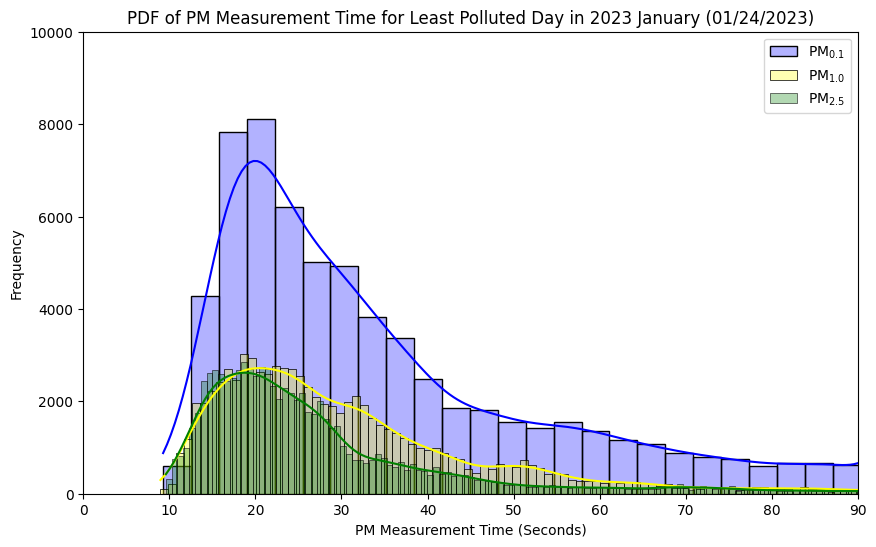

In [4]:
df1 = pd.read_csv("data/Parameters/pm0.1/2023-01-24.csv")
df2 = pd.read_csv("data/Parameters/pm0.3/2023-01-24.csv")
df3 = pd.read_csv("data/Parameters/pm0.5/2023-01-24.csv")
df4 = pd.read_csv("data/Parameters/pm1.0/2023-01-24.csv")
df5 = pd.read_csv("data/Parameters/pm2.5/2023-01-24.csv")
df6 = pd.read_csv("data/Parameters/pm5.0/2023-01-24.csv")
df7 = pd.read_csv("data/Parameters/pm10.0/2023-01-24.csv")

df1.x1 = df1.x1 * 60
df2.x1 = df2.x1 * 60
df3.x1 = df3.x1 * 60
df4.x1 = df4.x1 * 60
df5.x1 = df5.x1 * 60
df6.x1 = df6.x1 * 60
df7.x1 = df7.x1 * 60

plt.figure(figsize=(10, 6))


# Plot KDE using seaborn
sns.histplot(data=df1, x='x1', kde = True, alpha =0.3,  label='PM$_{0.1}$', color='blue')
sns.histplot(data=df4, x='x1', kde = True, alpha =0.3, label='PM$_{1.0}$', color='yellow')
sns.histplot(data=df5, x='x1', kde = True, alpha =0.3, label='PM$_{2.5}$', color='green')

plt.xlim(0, 90)
plt.ylim(0, 10000)
plt.xlabel('PM Measurement Time (Seconds)')
plt.ylabel('Frequency')
plt.title('PDF of PM Measurement Time for Least Polluted Day in 2023 January (01/24/2023)')
plt.legend()
plt.savefig(r"D:\UTD\UTDFall2023\Temporal_Variograms\firmware\plots\Least_Polluted_Day.png")
plt.show()


In [5]:
def peak_val(data):
    # Remove pairs where x >= 90
    filtered_list = [[x, y] for x, y in data if x < 90]

    # print(filtered_list)
    data = filtered_list
    # Find the (x, y) pair with the maximum y value
    max_y_pair = max(data, key=lambda pair: pair[1])
    
    print(f"The (x, y) pair with the maximum y value is: {max_y_pair}")
    return max_y_pair


The (x, y) pair with the maximum y value is: [19.769668210592027, 7201.752921849771]


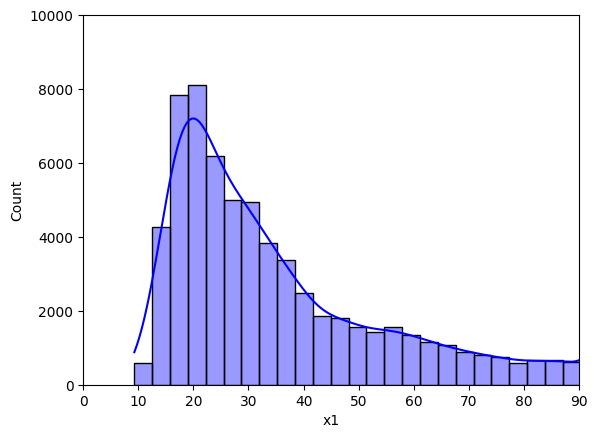

In [6]:
# Plot the probability density functions using kernel density estimates (KDE)
ax1 = sns.histplot(data=df1, x='x1',alpha = 0.4,  kde = True, color ="blue")
plt.xlim(0, 90)
plt.ylim(0, 10000)
data_1 =  ax1.lines[0].get_xydata()
peak_1 = peak_val(data_1)[0]

The (x, y) pair with the maximum y value is: [20.405780746735275, 2718.5700338305087]


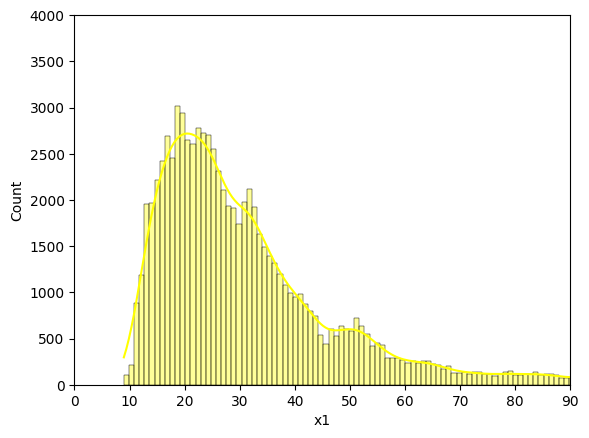

In [7]:
# Plot the probability density functions using kernel density estimates (KDE)
ax2 = sns.histplot(data=df4, x='x1',alpha = 0.4,  kde = True, color ="yellow")
plt.xlim(0, 90)
plt.ylim(0, 4000)
data_2 =  ax2.lines[0].get_xydata()
peak_2 = peak_val(data_2)[0]

The (x, y) pair with the maximum y value is: [18.691147348774727, 2619.138025198214]


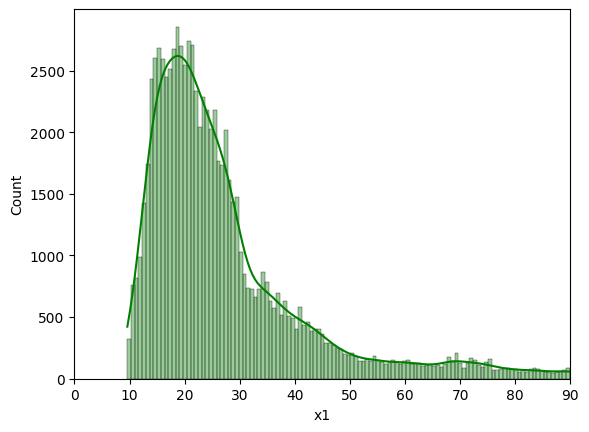

In [8]:
# Plot the probability density functions using kernel density estimates (KDE)
ax3 = sns.histplot(data=df5, x='x1',alpha = 0.4,  kde = True, color ="green")
plt.xlim(0, 90)
data_3 =  ax3.lines[0].get_xydata()
peak_3 = peak_val(data_3)[0]

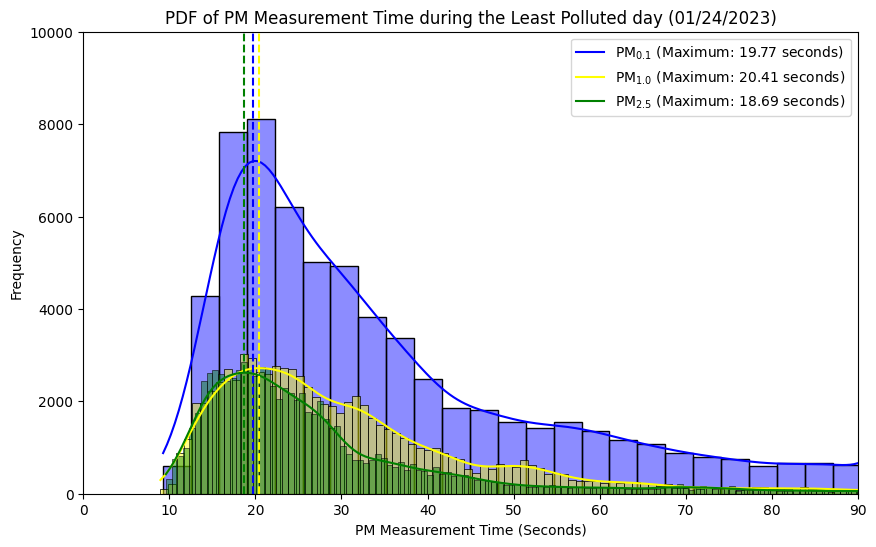

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='x1',alpha = 0.45,  kde = True, color ="blue", )
sns.histplot(data=df4, x='x1', alpha = 0.45, kde = True, color ="yellow")
sns.histplot(data=df5, x='x1', alpha = 0.45, kde = True,color ="green")



plt.xlim(0, 90)
plt.ylim(0, 10000)
plt.xlabel('PM Measurement Time (Seconds)')
plt.ylabel('Frequency')
plt.title('PDF of PM Measurement Time during the Least Polluted day (01/24/2023)')



plt.axvline(peak_1, color='blue', linestyle='dashed',)
plt.axvline(peak_2, color='yellow', linestyle='dashed')
plt.axvline(peak_3, color='green', linestyle='dashed')

legend_labels = ['PM$_{0.1}$', 'PM$_{1.0}$', 'PM$_{2.5}$']
for i, peak_value in enumerate([peak_1, peak_2, peak_3]):
    legend_labels[i] += f' (Maximum: {round(peak_value, 2)} seconds)'

# Update legend with custom labels
plt.legend(labels=legend_labels)

# Add the following lines to mark the peaks and set xticks
# all_xticks = list(plt.xticks()[0]) + [round(peak_1, 2), round(peak_2, 2), round(peak_3, 2)]
plt.xticks(fontsize=10)

# for tick in plt.xticks()[-1]:
    
#     if(tick.get_text() == str(round(peak_1, 2)) or tick.get_text() == str(round(peak_2, 2)) or tick.get_text() == str(round(peak_3, 2)) ):
#         tick.set_fontsize(15)
plt.savefig(r"D:\UTD\UTDFall2023\Temporal_Variograms\firmware\plots\Least_Polluted_Day_with_peak_times.png")
plt.show()


